<a href="https://colab.research.google.com/github/ayush9304/NetflixMoviesAndTVShowsClustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Netflix Movies and TV Shows Clustering** 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Ayush Kumar**

# **Project Summary -**

The Netflix Movies and TV Shows dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. This project is about using these information to create clusters of shows inorder to group similar shows which can help companies  to improve user engagement and satisfaction, which will lead to increased retention and company revenue.

The first phase of the project involved data wrangling. I converted data types of columns like date_added to datetime type and extracted year and month from it to two new columns month_added and year_added. Created new columns like genres as list of genres from listed_in, actors as list of actors from cast etc. Found out that duration unit of movies are in minutes and seasons for TV Shows.

Did EDA to analyse and get insights from the data like proportions of Movies and TV Shows, Number of Shows Released Each Year, top Countries with the Highest Number of TV Shows and Movies, top Ratings for Movies/Shows, top Genres, directors, actors, Movies/TV Shows by months of the year etc.

Next, I conducted hypothesis testing to validate my findings from EDA. I used one-sample t-test to test average duration of movies has decreased in the 21st century. I also used one-sample z-test for proportion to test The proportion of movies with a rating of 'TV-MA' (mature audience only) has increased in the last decade. The results of these tests confirmed my findings from EDA.

Next I did preprocessing of textual data, which included Expand Contraction, Lower Caseing, Removing punctuations, Stopwords, URLs, white spaces, Lemmatzation, Tokenization etc.

After preprocessing the data, TF-IDF vectorization was applied to convert text data into numerical data. Truncated SVD was used to reduce the dimensionality of the data, and the optimal number of components was 3000.

Algorithms used in this process include clustering techniques such as k-means and hierarchical clustering. These algorithms help Netflix group movies and TV shows with similar features into distinct groups, each representing a unique category.

The ultimate goal of this clustering is to improve the user experience on Netflix by providing personalized content recommendations to users using cosine similarity score. With the help of this, Netflix can suggest titles to users that are more likely to match their interests, making it more likely that users will stay engaged with the platform.

# **GitHub Link -**

[https://github.com/ayush9304/NetflixMoviesAndTVShowsClustering](https://github.com/ayush9304/NetflixMoviesAndTVShowsClustering)

# **Problem Statement**


**Write Problem Statement Here.**

Netflix is a streaming service that offers a wide variety of television shows and movies for viewers to watch at their convenience. With a monthly subscription, users have access to a vast library of content, including original series and films produced by Netflix. The platform also allows users to create multiple profiles, making it easy for family members or roommates to have their own personalized viewing experience. Additionally, Netflix allows users to download content to watch offline, making it a great option for those who travel frequently or have limited internet access. Overall, Netflix is a convenient and cost-effective way to access a wide variety of entertainment.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to group Netflix movies and TV Shows into different clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# libraries to do statistical analysis and tests
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# libraries for text prprocessing
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud, STOPWORDS
!pip install contractions
import contractions
from collections import Counter
import itertools
import string

# libraries for modelling
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [10]:
# Load Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/ayush9304/NetflixMoviesAndTVShowsClustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape[0]

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

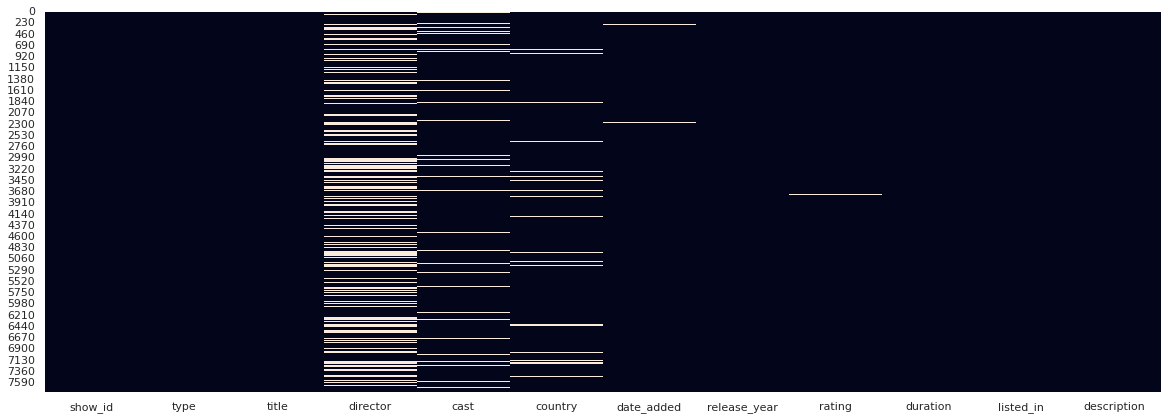

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. It contains informations like title, director, cast, country, release_year, rating, duration	etc.

It has 7787 rows and 12 columns in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description 

* **show_id:** Unique ID for every Movie/TV Show
* **type:** Identifier - Movie or TV Show
* **title:** Title of the Movie/TV Show
* **director:** Director of the show
* **cast:** Actors involved
* **country:** Country of production
* **date_added:** Date it was added on Netflix
* **release_year:** Actual Release year of the show
* **rating:** TV Rating of the show
* **duration:** Total Duration in minutes or number of seasons
* **listed_in:** Genre
* **description:** The summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Create a copy of the current dataset and assigning to df
df = dataset.copy()

In [ ]:
# First 5 rows of df
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# Checking different format types of duration for TV Shows and Movies
# Define regular expression patterns for TV show and movie durations
tvshow_pattern = r'^\d+ (Season|Seasons)$$'
movie_pattern = r'^\d+ min$'

# Check if all TV show durations match the pattern
tvshow_durations = df[df['type'] == 'TV Show']['duration']
tvshow_matches = all(tvshow_durations.str.match(tvshow_pattern))
print("All TV shows have durations in the format of n Seasons: ", tvshow_matches)

# Check if all movie durations match the pattern
movie_durations = df[df['type'] == 'Movie']['duration']
movie_matches = all(movie_durations.str.match(movie_pattern))
print("All movies have durations in the format of n minutes: ", movie_matches)


All TV shows have durations in the format of n Seasons:  True
All movies have durations in the format of n minutes:  True


In [12]:
# Getting number(digit) from duration column for EDA
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [13]:
# First 5 rows of listed_in column
df['listed_in'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

In [14]:
#splitting listed_in into genre list
df['genres'] = df['listed_in'].apply(lambda x :  x.split(', '))

In [15]:
# Last 5 rows of country column
df['country'].tail()

7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, dtype: object

In [16]:
#splitting country into country list
df.loc[~df.country.isna(), 'country_list'] = df[~df.country.isna()]['country'].apply(lambda x :  x.split(', '))

In [17]:
# First 5 rows of cast column
df['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [18]:
#splitting cast into actors list
df['actors'] = df['cast'].str.split(', ')

In [19]:
# First 5 rows of date_added column
df['date_added'].head()

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object

In [20]:
# creating new features from date_added for EDA
# Converting date_added from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

# Creating new columns month and year of date_added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

### What all manipulations have you done and insights you found?

There are two types of shows in the data i.e., Movies and TV Shows. Duration of movies is in minutes and for TV Shows duration is in Seasons. Listed_in column contains genres seperated by commas, created new column genre containing list of genres that will be helpful in EDA. Similarly splitted country column into country_list, cast into actors. Converted date_added to datetime type and extracted month and year from it to new columns.
Next I'll be doing EDA for getting insights through visualizations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar & Pie Chart of show types

Text(0.5, 0.98, 'Distribution of Movies and TV Shows')

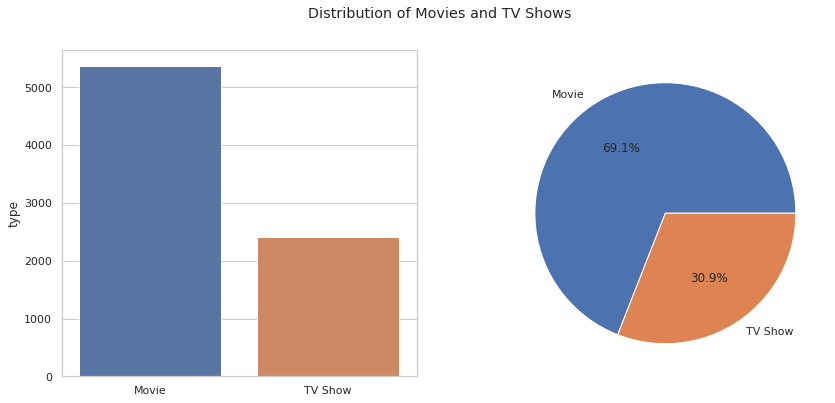

In [ ]:
# Show type count and percentage
d = df['type'].value_counts()

# Movies & TV Shows count
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=d.index, y=d)

# Movies & TV Shows percentages
plt.subplot(1,2,2)
p = plt.pie(d, labels=d.index, autopct="%.1f%%")
plt.suptitle('Distribution of Movies and TV Shows')

##### 1. Why did you pick the specific chart?

To check proportion and counts of different types of Shows

##### 2. What is/are the insight(s) found from the chart?

Less than 1/3rd of all shows are TV Shows and rest are Movies, which means producers are directors are releasing more movies compared to TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 2 - Line Chart - Movies/Shows by year

Text(0, 0.5, 'Count')

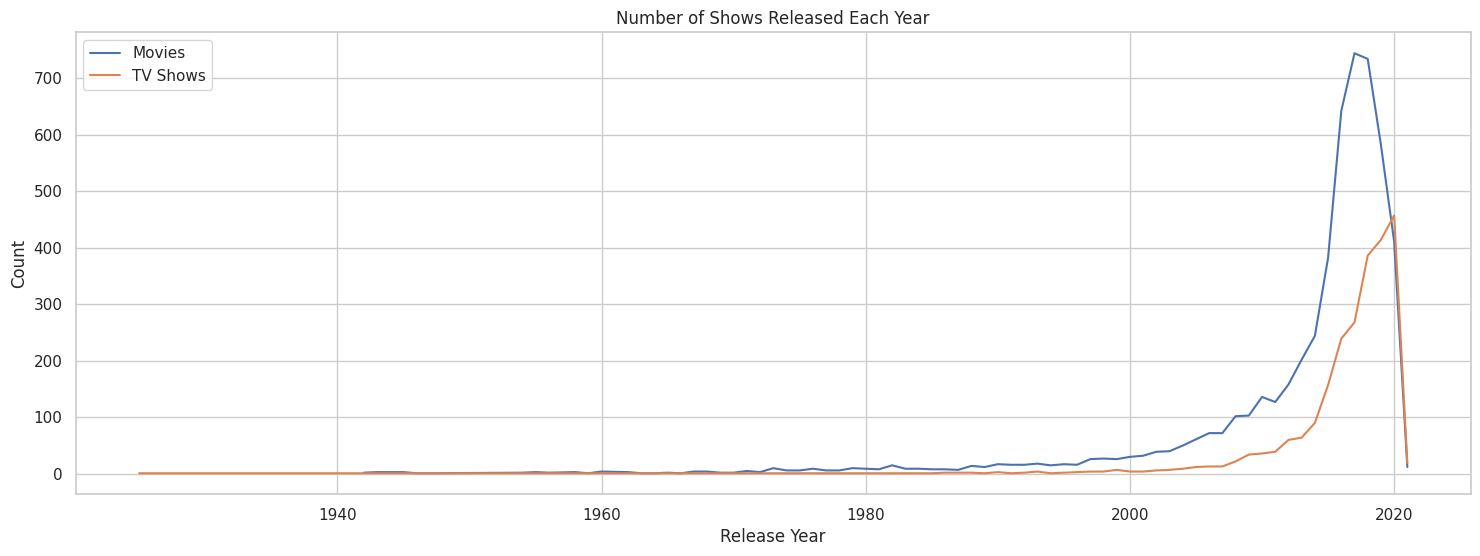

In [67]:
# Trend of number of releases of Movies/TV Shows over the years
# yearly release counts of movies
yearly_movies_count = df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False)
# yearly release counts of TV Shows
yearly_shows_count = df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(18,6))
sns.lineplot(x=yearly_movies_count.index, y=yearly_movies_count, label='Movies')
sns.lineplot(x=yearly_shows_count.index, y=yearly_shows_count, label='TV Shows')
plt.title('Number of Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

To visualize trend of number of releases of Movies/TV Shows over the years.

##### 2. What is/are the insight(s) found from the chart?

Number of Movies / TV Shows release hase increased exponentially after 2000.

More Movies are getting released every year compared to TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 3 - Countries with highest number of Shows/Movies

Text(0.5, 0.98, 'Top Countries with the Highest Number of TV Shows and Movies')

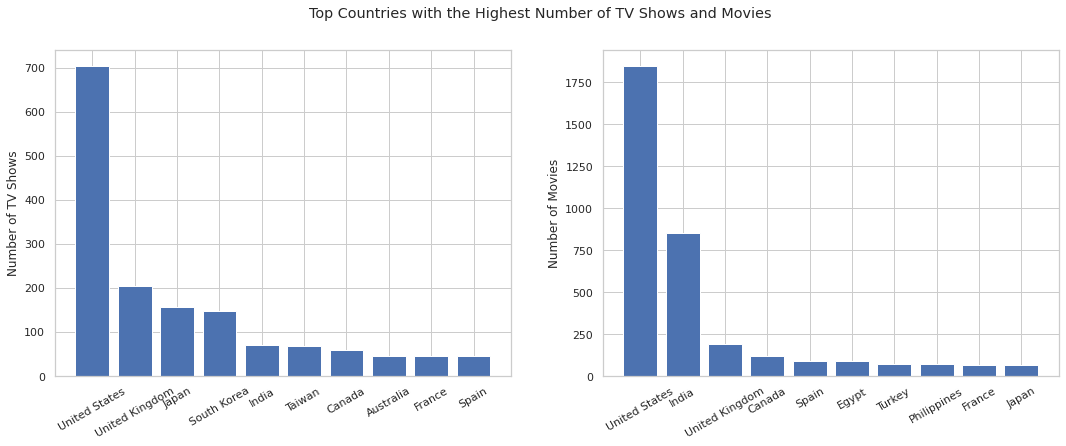

In [ ]:
# Group the data by country and type, and count the number of entries in each group
d = df.groupby(['country', 'type']).size().reset_index(name='count')

# Getting shows of both types
d_tv = d[d['type'] == 'TV Show']
d_movies = d[d['type'] == 'Movie']

# Sort the result by count and get the top 10 countries
df_top_tv = d_tv.sort_values('count', ascending=False).head(10)
df_top_movies = d_movies.sort_values('count', ascending=False).head(10)

# Create a bar chart of the top countries with the highest number of TV Shows
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(df_top_tv['country'], df_top_tv['count'])
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.bar(df_top_movies['country'], df_top_movies['count'])
plt.ylabel('Number of Movies')
plt.xticks(rotation=30)
plt.suptitle('Top Countries with the Highest Number of TV Shows and Movies')


##### 1. Why did you pick the specific chart?

To visualize which country have highest contents for both types of shows.

##### 2. What is/are the insight(s) found from the chart?

United States produces most number of contents of both types of shows. Which is followed by UK for TV Shows and India for Movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 4 - Top Ratings for Movies/Shows

Text(0.5, 0.98, 'Top movie and shows by ratings')

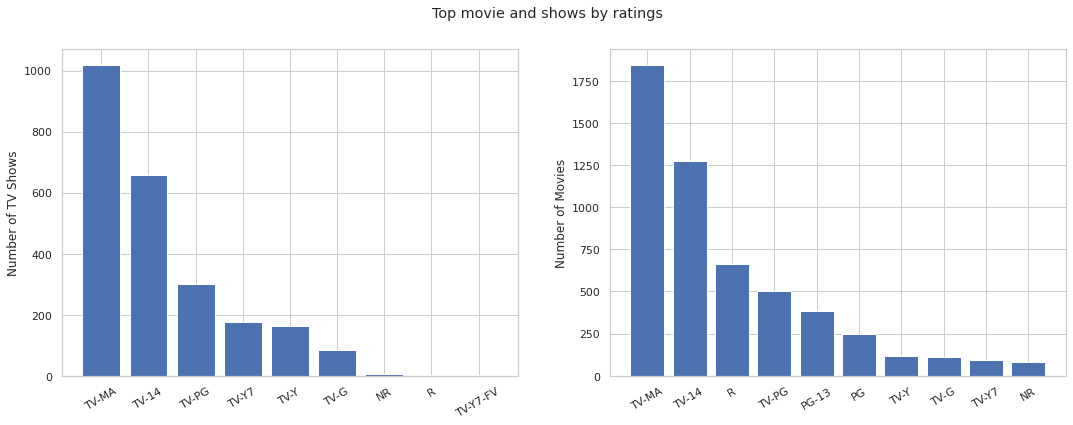

In [ ]:
# Group the data by country and type, and count the number of entries in each group
d = df.groupby(['type', 'rating']).size().reset_index(name='count')

# Getting shows of both types
d_tv = d[d['type'] == 'TV Show']
d_movies = d[d['type'] == 'Movie']

# Sort the result by count and get the top 10 countries
df_top_tv = d_tv.sort_values('count', ascending=False).head(10)
df_top_movies = d_movies.sort_values('count', ascending=False).head(10)

# Create a bar chart of the top countries with the highest number of TV Shows
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(df_top_tv['rating'], df_top_tv['count'])
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.bar(df_top_movies['rating'], df_top_movies['count'])
plt.ylabel('Number of Movies')
plt.xticks(rotation=30)
plt.suptitle('Top movie and shows by ratings')

##### 1. Why did you pick the specific chart?

To visualize top ratings for both content type.

##### 2. What is/are the insight(s) found from the chart?

TV-MA rated type TV Shows and Movies are produced most.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 5 - Top Genres

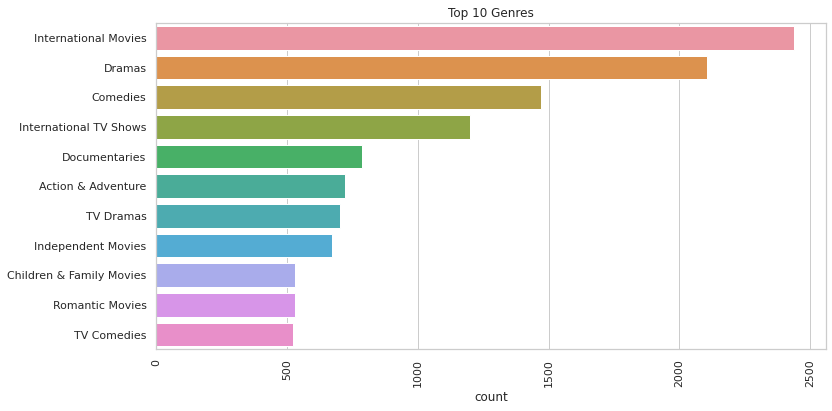

In [ ]:
#Top 10 genres plot
genres = []
#count genre for each movies and shows
for i in df['genres']: 
  genres += i

# Using Counter class from collections library for counting shows by genere
cnts = Counter(genres)
genre_dict = dict(sorted(cnts.items(), key=lambda x: x[1], reverse=True))

df_genre_count = pd.DataFrame(genre_dict.values(), index=genre_dict.keys(), columns=['count']).sort_values(by='count', ascending=False).iloc[:11]

plt.figure(figsize=(12,6))
sns.barplot(y=df_genre_count.index, x=df_genre_count['count'])
plt.title("Top 10 Genres")
_ = plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

To visualize most popular generes of shows produced.

##### 2. What is/are the insight(s) found from the chart?

International Movies are the most popular genre followed by Drama and Comedies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 6 - Top Directors for Movies/Shows

Text(0.5, 1.0, 'Top TV Shows directors')

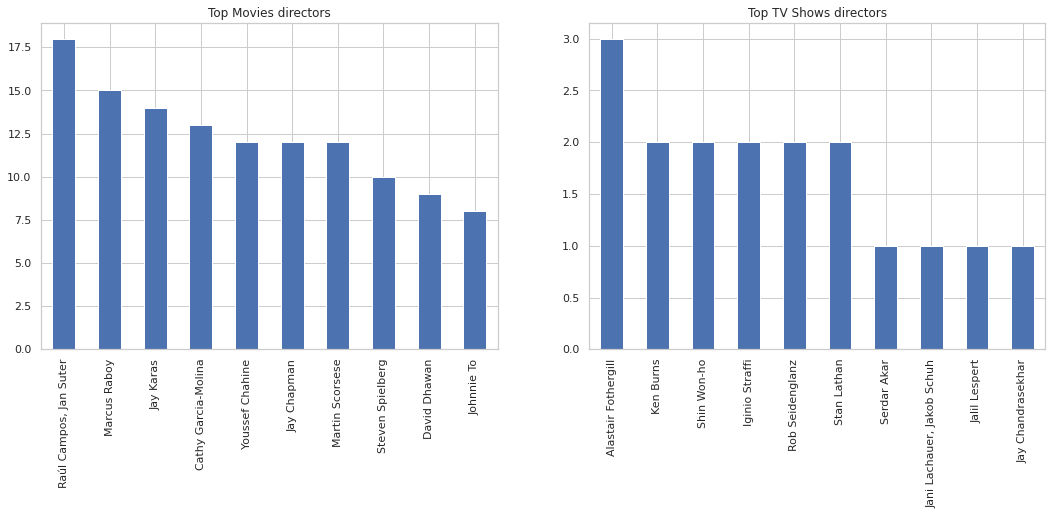

In [ ]:
# top 10 directors who directed Movies and TV Shows
plt.figure(figsize=(18,6))

# Top directors for Movies
plt.subplot(1,2,1)
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='bar')
plt.title('Top Movies directors')

# Top directors for TV Shows
plt.subplot(1,2,2)
# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='bar')
plt.title('Top TV Shows directors')

##### 1. Why did you pick the specific chart?

To visualize top directors for Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos, Jan Suter directed most number of Movies whereas Alastair Fothergill directed most number of TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 7 - Top Actors

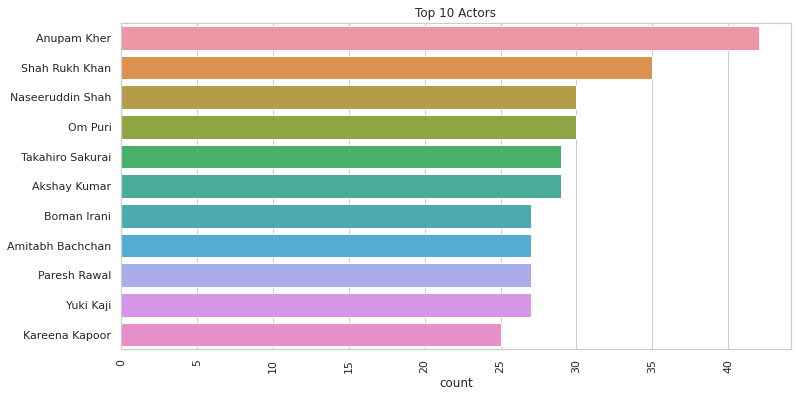

In [ ]:
# Top 10 actors plot
actors = []
# getting list of all actors in dataset
for i in df['actors'].dropna():
  actors += i
    
# Counting number of movies each actor acted in
lsts = list(df['actors'].dropna())
cnts = Counter(list(itertools.chain(*lsts)))
actor_dict = dict(sorted(cnts.items(), key=lambda x: x[1], reverse=True))

df_actor_count = pd.DataFrame(actor_dict.values(), index=actor_dict.keys(), columns=['count']).sort_values(by='count', ascending=False).iloc[:11]

plt.figure(figsize=(12,6))
sns.barplot(y=df_actor_count.index, x=df_actor_count['count'])
plt.title("Top 10 Actors")
_ = plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

To visualize actors acted in most number of movies.

##### 2. What is/are the insight(s) found from the chart?

Anupam Kher tops the list, followed by Shah Rukh Khan, Naseeruddin Shah etc. Top actors are mostly indian.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 8 - Movie Duration distribution

Text(0.5, 0, 'Minutes')

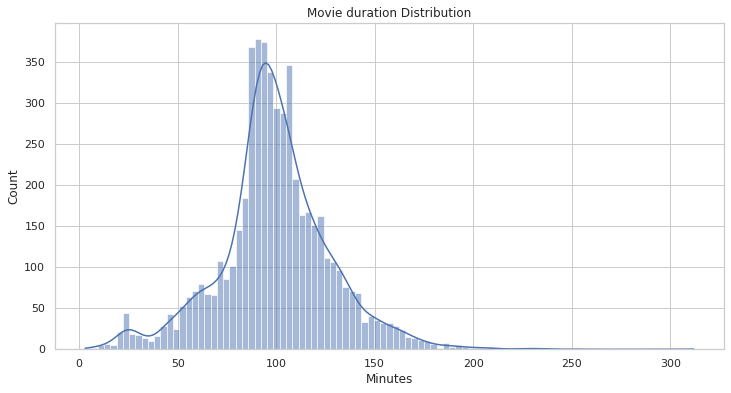

In [ ]:
# Movie duration Distribution
plt.figure(figsize=(12,6))
sns.histplot(x='duration', data=df[df['type']=='Movie'], kde=True)
plt.title('Movie duration Distribution')
plt.xlabel('Minutes')

##### 1. Why did you pick the specific chart?

To visualize distribution of duration of movies produced.

##### 2. What is/are the insight(s) found from the chart?

Distribution is normal with most movies have duration near 90 minutes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It may not have a significant positive business impact.

#### Chart - 9 - TV Shows duration distributions

Text(0.5, 0, 'Seasons')

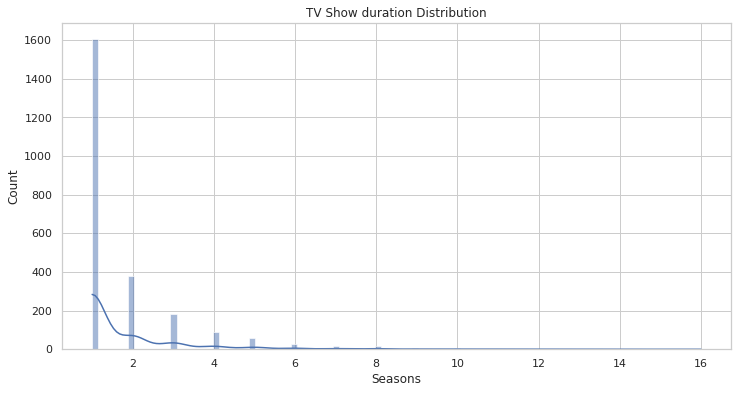

In [ ]:
# TV Show duration Distribution
plt.figure(figsize=(12,6))
sns.histplot(x='duration', data=df[df['type']=='TV Show'], kde=True)
plt.title('TV Show duration Distribution')
plt.xlabel('Seasons')

##### 1. Why did you pick the specific chart?

To visualize distribution of duration of TV Shoes produced.

##### 2. What is/are the insight(s) found from the chart?

Most TV Shows have just 1 Season released followed by 2 season which is significantly lower than number of TV Shows with 1 Season.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It may not have a significant positive business impact.

#### Chart - 10 - Avg Movie Duration over the years

Text(0.5, 0, 'Year')

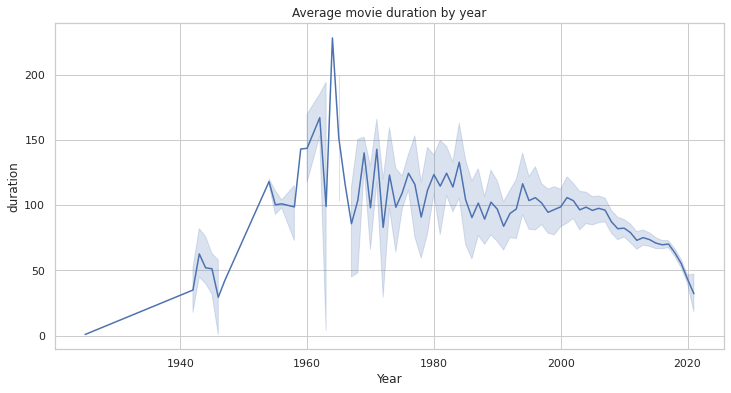

In [ ]:
# Average movie duration by years
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='duration', data=df)
plt.title('Average movie duration by year')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

To visualize the trend of average duration of movies over the years.

##### 2. What is/are the insight(s) found from the chart?

During 1960s the average duration of movies was the heighest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It may not have a significant positive business impact.

#### Chart - 11 - Movies/TV Shows by months of the year

Text(0.5, 1.0, 'TV Shows/Movies added each month over the years')

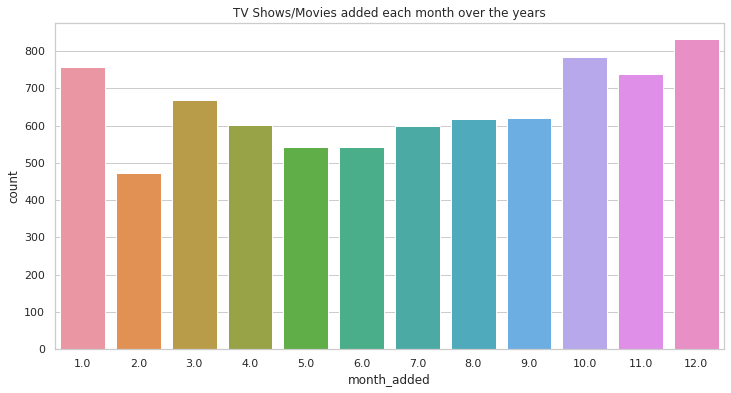

In [ ]:
# Number of shows added by months
plt.figure(figsize = (12,6))
sns.countplot(x=df['month_added'])
plt.title('TV Shows/Movies added each month over the years')

##### 1. Why did you pick the specific chart?

To visualize number of contents added by months of the year.

##### 2. What is/are the insight(s) found from the chart?

More movies / TV Shows are added during winter months. Since USA has the highest number of shows, there winter months also assisiated by holiday season of christmas.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 12 - Top countries by content type

Text(0.5, 1.0, 'Top countries content type')

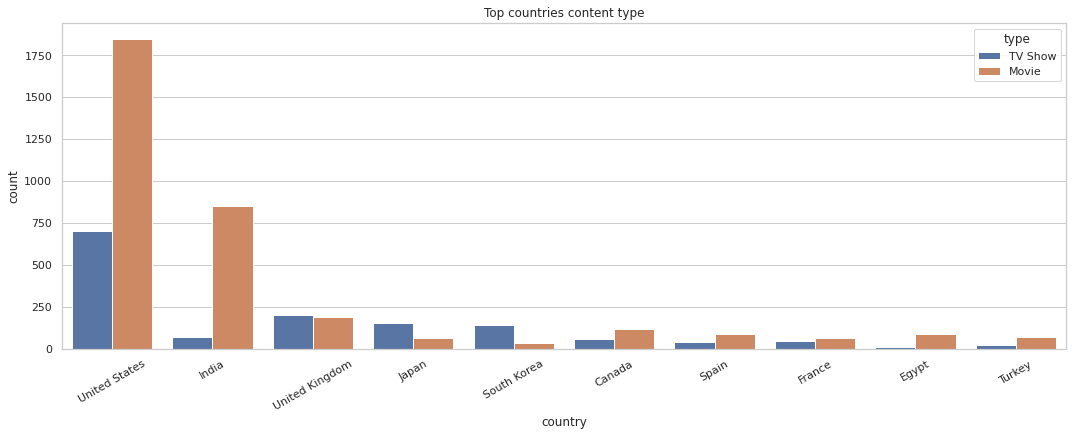

In [ ]:
# Top countries content type 
plt.figure(figsize=(18,6))
sns.countplot(x=df['country'] ,order=df['country'].value_counts().index[0:10], hue=df['type'])
plt.xticks(rotation=30)
plt.title('Top countries content type')

##### 1. Why did you pick the specific chart?

To visualize types of shows top countries produces.

##### 2. What is/are the insight(s) found from the chart?

In case of India and USA, more movies are produced compared to TV Shows. In case of UK, almost equal TV Shows and Movies are produced. Whereas for Japan, South Korea more TV Shows are produced.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 13 - Number of Movies by Ratings over the Years

Text(0.5, 0.98, 'Number of Movies by Ratings over the Years')

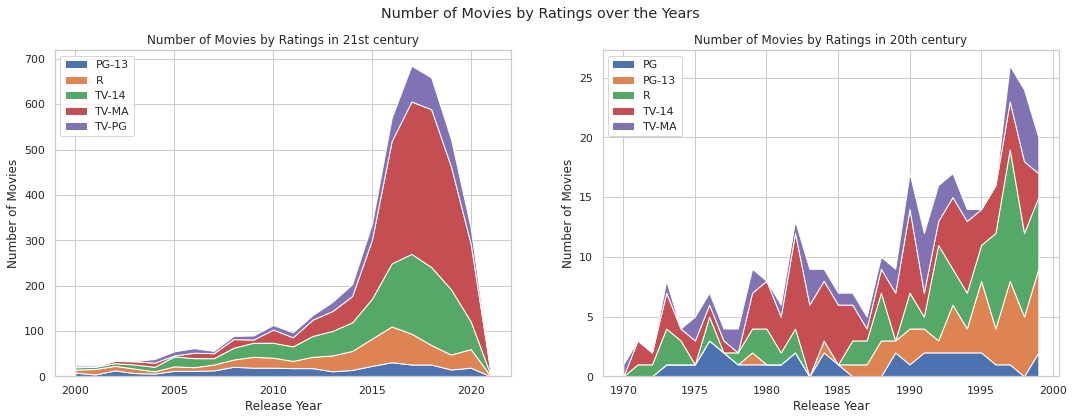

In [ ]:
#Trend of number of movies by ratings over the years
# Filter only movies
movies_21st = df[(df['type'] == 'Movie') & (df['release_year'] >= 2000)]
movies_20th = df[(df['type'] == 'Movie') & (df['release_year'] < 2000) & (df['release_year'] >=1970)]

# Group by rating and release year, and count the number of movies
movies_by_rating_year_21st = movies_21st.groupby(['rating', 'release_year']).size().reset_index(name='count')
movies_by_rating_year_20th = movies_20th.groupby(['rating', 'release_year']).size().reset_index(name='count')

# Select the top 5 rating categories by the total count of movies
top_ratings_21st = movies_by_rating_year_21st.groupby('rating').sum().sort_values(by='count', ascending=False).head(5).index
top_ratings_20th = movies_by_rating_year_20th.groupby('rating').sum().sort_values(by='count', ascending=False).head(5).index
movies_by_rating_year_top_21st = movies_by_rating_year_21st[movies_by_rating_year_21st['rating'].isin(top_ratings_21st)]
movies_by_rating_year_top_20th = movies_by_rating_year_20th[movies_by_rating_year_20th['rating'].isin(top_ratings_20th)]

# Pivot the table to have ratings as columns and release year as index
movies_by_rating_year_pivot_21st = movies_by_rating_year_top_21st.pivot(index='release_year', columns='rating', values='count').fillna(0)
movies_by_rating_year_pivot_20th = movies_by_rating_year_top_20th.pivot(index='release_year', columns='rating', values='count').fillna(0)

# Plot the area plot
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.stackplot(movies_by_rating_year_pivot_21st.index, movies_by_rating_year_pivot_21st.values.T, labels=movies_by_rating_year_pivot_21st.columns)
plt.legend(loc='upper left')
plt.title('Number of Movies by Ratings in 21st century')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

plt.subplot(1,2,2)
plt.stackplot(movies_by_rating_year_pivot_20th.index, movies_by_rating_year_pivot_20th.values.T, labels=movies_by_rating_year_pivot_20th.columns)
plt.legend(loc='upper left')
plt.title('Number of Movies by Ratings in 20th century')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

plt.suptitle("Number of Movies by Ratings over the Years")


##### 1. Why did you pick the specific chart?

To visualize distribution of differently rated movies produced for 20th and 21st century.

##### 2. What is/are the insight(s) found from the chart?

In 20th century almost all types rated shows were produced in somewhat similar number, whereas in 21st century the popularity of TV-MA has increased specially after 2010.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 14 - Countries with highest avg movie duration

Text(0.5, 1.0, 'Average movies duration by country')

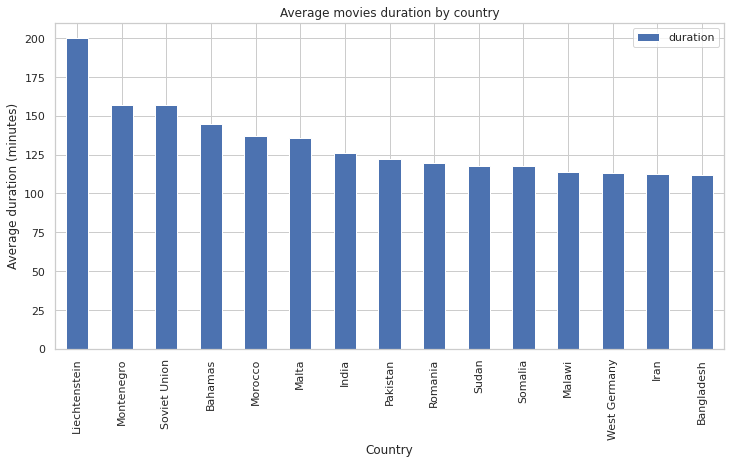

In [ ]:
# create a new dataframe with exploded countries
df_countries = df.explode('country_list')

# filter only movies
df_movies = df_countries[df_countries['type'] == 'Movie']

# group by country and calculate mean duration
df_duration = df_movies.groupby('country_list')['duration'].mean().reset_index()

# sort by duration
df_duration = df_duration.sort_values(by='duration', ascending=False).head(15)

# plot the bar chart
ax = df_duration.plot.bar(x='country_list', y='duration', figsize=(12,6))
ax.set_xlabel('Country')
ax.set_ylabel('Average duration (minutes)')
ax.set_title('Average movies duration by country')


##### 1. Why did you pick the specific chart?

To visualize countries with highest average duration of movies.

##### 2. What is/are the insight(s) found from the chart?

Average movies produced in Liechtenstein is heighest followed by Montenegro, Soviet Union etc.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It may not have a significant positive business impact.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average duration of movies has decreased in the 21st century.
2. The proportion of movies with a rating of 'TV-MA' (mature audience only) has increased in the last decade.
3. There is a significant difference in the average duration of movies released in the United States compared to those released in India.

### Hypothetical Statement - 1

The average duration of movies has decreased in the 21st century.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The average duration of movies in 21st century is the same as average duration of movies in 20th century.

**Alternative Hypothesis:** The average duration of movies in 21st century is lower than the average duration of movies in 20th century.

**Test Type:** one-tailed one-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Subset to only include movies
movies_df = df[df["type"] == "Movie"]

# Split into 20th and 21st century data
movies_20th = movies_df[movies_df["release_year"] < 2000]
movies_21st = movies_df[movies_df["release_year"] >= 2000]

# Calculate mean durations
mean_20th = np.mean(movies_20th["duration"])
mean_21st = np.mean(movies_21st["duration"])

# Perform one-sample t-test
t_stat, p_val = ttest_1samp(movies_21st["duration"], mean_20th)

# Print the results
print("P-value:", p_val)
print()
if p_val < 0.05:
  print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, The average duration of movies has decreased in the 21st century.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, The average duration of movies has not decreased in the 21st century.")


P-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, The average duration of movies has decreased in the 21st century.


##### Which statistical test have you done to obtain P-Value?

I have used one-tailed one-sample t-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the average duration of movies has decreased in the 21st century.

##### Why did you choose the specific statistical test?

I used a one-tailed, one-sample t-test to compare the mean duration of movies in the 21st century to the mean duration of movies in the 20th century. 

### Hypothetical Statement - 2

The proportion of movies with a rating of 'TV-MA' (mature audience only) has increased in the last decade. 

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis:** The proportion of movies with a rating of 'TV-MA' has remained constant in the last decade.

**Alternate hypothesis:** The proportion of movies with a rating of 'TV-MA' has increased in the last decade.

**Test Type:** one-sample z-test for proportion

#### 2. Perform an appropriate statistical test.

In [ ]:
# Filter for movies released in the last decade (2011-2021)
recent_movies = df[(df['type'] == 'Movie') & (df['release_year'] >= 2011)]

# Calculate the proportion of movies with an 'R' rating in last decade
r_proportion = len(recent_movies[recent_movies['rating'] == 'TV-MA']) / len(recent_movies)

# Overall historical proportion of movies with an 'R' rating
overall_proportion = len(df[df['rating'] == 'TV-MA']) / len(df)

# Perform a one-sample proportion test
z_score, p_val = proportions_ztest(r_proportion * len(recent_movies), len(recent_movies), overall_proportion)

# Print the results
print("P-value:", p_val)
print()
if p_val < 0.05:
  print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.")
  print("The proportion of movies with a rating of 'TV-MA' has increased in the last decade.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.")
  print("Hence, The proportion of movies with a rating of 'TV-MA' has remained same in the last decade.")

P-value: 3.5336533533348024e-05

Since p-value (3.5336533533348024e-05) is less than 0.05, we reject null hypothesis.
The proportion of movies with a rating of 'TV-MA' has increased in the last decade.


##### Which statistical test have you done to obtain P-Value?

I have used one-sample proportion z-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the proportion of movies with a rating of 'R' has increased in the last decade.

##### Why did you choose the specific statistical test?

To test this hypothesis, we can use a one-sample z-test for proportion. We would compare the proportion of movies with an 'R' rating in the last decade to the proportion of movies with an 'R' rating in the entire dataset.

### Hypothetical Statement - 3

There is a significant difference in the average duration of movies released in the United States compared to those released in India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** There is no significant difference in the average duration of movies released in the United States compared to those released in India.

**Alternate Hypothesis:** There is a significant difference in the average duration of movies released in the United States compared to those released in India.

**Test Type:** two-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Create a new dataframe with one row per country since some movies are released in multiple countries
d = df[df['type']=='Movie'].explode('country_list')

# Subset data for movies released in the US and India
us_movies = d[d['country_list'] == 'United States']['duration']
india_movies = d[d['country_list'] == 'India']['duration']

# Perform t-test
t_stats, p_val = ttest_ind(us_movies, india_movies, equal_var=True)

# Print the results
print("Average movie duration in India:", round(india_movies.mean(), 1), "mins")
print("Average movie duration in USA:", round(us_movies.mean(), 1), "mins")
print("P-value:", p_val)
print()
if p_val < 0.05:
  print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.")
  print("There is a significant difference in the average duration of movies released in the United States compared to those released in India.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.")
  print("Hence, There is no significant difference in the average duration of movies released in the United States compared to those released in India.")

Average movie duration in India: 126.3 mins
Average movie duration in USA: 92.4 mins
P-value: 6.335181559401942e-221

Since p-value (6.335181559401942e-221) is less than 0.05, we reject null hypothesis.
There is a significant difference in the average duration of movies released in the United States compared to those released in India.


##### Which statistical test have you done to obtain P-Value?

I have used two-sample t-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and there is a significant difference in the average duration of movies released in the United States compared to those released in India..

##### Why did you choose the specific statistical test?

The reason for using a two-sample t-test is that we have two independent samples (movies released in the US and movies released in India), and we want to compare the means of these two samples.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Get count and percentage of missing values for each column
missing_count = df.isna().sum()
missing_percent = df.isna().sum()/len(df)*100

# Combine count and sum into a single dataframe
missing_df = pd.concat([missing_count, missing_percent], axis=1)
missing_df.columns = ['missing_count', 'missing_percent']
missing_df.sort_values(by='missing_percent', ascending=False)

missing_count  missing_percent
director               2389        30.679337
cast                    718         9.220496
actors                  718         9.220496
country_list            507         6.510851
country                 507         6.510851
year_added               10         0.128419
month_added              10         0.128419
date_added               10         0.128419
rating                    7         0.089893
duration                  0         0.000000
listed_in                 0         0.000000
description               0         0.000000
genres                    0         0.000000
type                      0         0.000000
release_year              0         0.000000
title                     0         0.000000
show_id                   0         0.000000

* Director column as most missing values (around 30%) and it is categorical variable. We cannot use mode here because number of missing values is large and hence will create new 'Unknown' category to replace missing values.
* For cast and country columns, number of missing values are not that high but still not negeligible so imputing it same way as director column.
* Out of more than 7000 rows only 10 rows have missing values in date_added column, and I can't use mode in date field as it will not appropriate so I will drop it.
* In case of  rating column, it is a categorical variable so will use mode.

In [21]:
# Handling the missing values
df[['director','cast','country','country_list','actors']] = df[['director','cast','country','country_list','actors']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(subset=['date_added'], inplace=True)

In [22]:
# checking for null values after treating them.
df.isna().sum().sort_values(ascending=False)

show_id         0
duration        0
month_added     0
actors          0
country_list    0
genres          0
description     0
listed_in       0
rating          0
type            0
release_year    0
date_added      0
country         0
cast            0
director        0
title           0
year_added      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Columns like 'director', 'cast', 'country' had textual data values hence I used 'Unknown' keyword all missing values.
'rating' columns had categorical value so used mode for imputing values.
The number of missing values in 'date_added' was very small so dropped them.

### 2. Handling Outliers

In [ ]:
df.head(2)

show_id     type title           director  \
0      s1  TV Show    3%            Unknown   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   

                                              genres country_list  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...     [Brazil]   
1                     [Dramas, International Movies]     [Mexico]   

                                              actors  month_added  year_added  
0  [João Miguel, Bianca Comparato, Michel Gomes, ...          8.0      2020.0  
1  [Demián Bichir, Héctor Bonilla, Oscar Serrano,...         12.0      2016.0

<Axes: xlabel='release_year'>

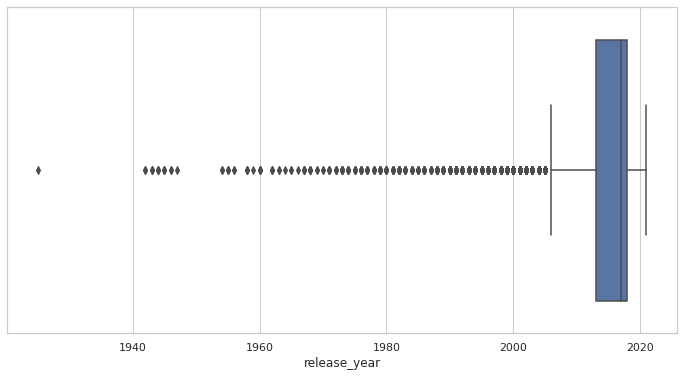

In [ ]:
# Checking for Outliers in release_year column
plt.figure(figsize=(12,6))
sns.boxplot(x=df['release_year'])

The data I'm mainly contains information about Movies/TV Shows are in textual format like description, country, listed_in etc. So for this task release_year is not that important. so ignoring this column. Hence no need to treat outliers.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [23]:
# creating copy to preserve original textual data just in case
df2 = df.copy()

#### 1. Expand Contraction

In [24]:
# Function to apply contraction expansion to a string
def expand_contractions(text):
    return contractions.fix(text)

In [25]:
# Apply contraction expansion to the description column
df2['description'] = df2['description'].apply(expand_contractions)

In [26]:
# Concatenating all important text columns for text preprocessing for each row into one feature
df2['movie_data'] = df['director'] + ' ' + df['country'] + ' ' + df['rating'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

In [27]:
# Sample combined textual data
df2['movie_data'][1]

'Jorge Michel Grau Mexico TV-MA Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato Dramas, International Movies After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

#### 2. Lower Casing

In [28]:
# Lowering cases of words
df2['movie_data'] = df2['movie_data'].str.lower()

#### 3. Removing Punctuations

In [29]:
# Function to remove all punctuations from text
# got list of punctuations from string library
def remove_punctuations(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [30]:
# Removing punctuations row by row
df2['movie_data'] = df2['movie_data'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words and digits contain digits.

In [31]:
# Function to remove URLs if any as they doesnot contain any useful info about the shows, it is just an address
def remove_urls(text):
  text = re.sub(r'http\S+|www\S+', '', text)
  return text

In [32]:
# Removing urls row by row
df2['movie_data'] = df2['movie_data'].apply(remove_urls)

#### 5. Removing Stopwords & Removing White spaces

In [33]:
# Fuction to removing stopwords
def remove_stopwords(text):
    # Getting words from text
    words = nltk.word_tokenize(text)
    # Removing english stopwords from the list of words
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Joining the remaining words back into sentence
    text = ' '.join(words)
    return text

In [34]:
# Function to remove extra whitespaces
def remove_whitespaces(text):
    # Replace all sequences of whitespace characters with a single space
    text = re.sub('\s+', ' ', text)
    # Remove any leading or trailing whitespace
    text = text.strip()
    return text

In [35]:
# Removing stopwords and extra spaces from text row by row
df2['movie_data'] = df2['movie_data'].apply(remove_stopwords)
df2['movie_data'] = df2['movie_data'].apply(remove_whitespaces)

In [36]:
# Sample processed data
df2['movie_data'][1]

'jorge michel grau mexico tvma demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato dramas international movies devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

#### 6. Text Normalization

In [37]:
# Applying lemmatization to bring words ito their base forms
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize each word in a sentence
def lemmatize_sentence(sentence):
    token_words = nltk.word_tokenize(sentence)
    lem_sentence = [lemmatizer.lemmatize(word, pos='v') for word in token_words]
    lem_sentence = ' '.join(lem_sentence)
    return lem_sentence

In [38]:
# Applying lemmatization on movie_data column
df2['movie_data'] = df2['movie_data'].apply(lemmatize_sentence)

In [39]:
# Sample data after lemmatization
df2['movie_data'][1]

'jorge michel grau mexico tvma demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato dramas international movies devastate earthquake hit mexico city trap survivors walk life wait rescue try desperately stay alive'

##### Which text normalization technique have you used and why?

I used Lemmatization to normaliza data, because in general, lemmatization is a more accurate method than stemming, also the dataset is not too big (just 7.7k rows) so speed is not a concern hence, for better accuracy lemmatization is recommended.

#### 7. Tokenization

In [40]:
# Creating TweetTokenizer instance for getting tokens (words) from sentences
tokenizer = TweetTokenizer()

In [41]:
# Applying tokenization
df2['movie_data'] = df2['movie_data'].apply(lambda x: tokenizer.tokenize(x))

In [42]:
# sample movie_data after tokenization
print(df2['movie_data'][1])

['jorge', 'michel', 'grau', 'mexico', 'tvma', 'demián', 'bichir', 'héctor', 'bonilla', 'oscar', 'serrano', 'azalia', 'ortiz', 'octavio', 'michel', 'carmen', 'beato', 'dramas', 'international', 'movies', 'devastate', 'earthquake', 'hit', 'mexico', 'city', 'trap', 'survivors', 'walk', 'life', 'wait', 'rescue', 'try', 'desperately', 'stay', 'alive']


#### 8. Text Vectorization

In [43]:
df3 = df2.copy()

In [44]:
# data is already tokenized using TweetTokenizer hence creating identity_tokenizer which doesnot changes anything
def identity_tokenizer(text):
    return text

# Creating TfidfVectorizer instance
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 10000)

# fitting and transforming processed text data using tfidf vectorizer
X = tfidf.fit_transform(df2['movie_data']).toarray()

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [45]:
# shape of data after text vectorization
X.shape

(7777, 10000)

##### Which text vectorization technique have you used and why?

I used TF-IDF vectorization beacause not only gives importance to number of occurances of a word but also to rareity of that word.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes dimentionality reduction is needed because the data has become wide data, with 7.7k rows and 7.7k columns. Hence to tackle curse of dimentionality problem we need dimentionality reduction.

In [ ]:
# create TruncatedSVD object
svd = TruncatedSVD(n_components=X.shape[1]-1)

# fit and transform the data
X_svd = svd.fit_transform(X)

In [ ]:
X_svd.shape

(7777, 7777)

Text(0, 0.5, 'Explained Variance Ratio')

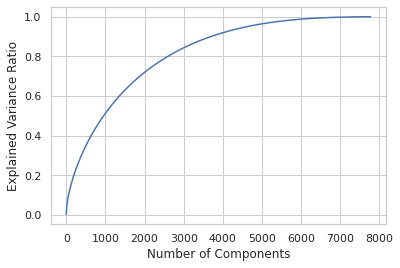

In [ ]:
# plot explained variance ratio
plt.plot(range(1, 7778), np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

More than 80% of variance is explained by 3000 components. Hence I'll go for n_components=3000.

In [ ]:
# create TruncatedSVD object with n_components=n
svd = TruncatedSVD(n_components=3000)

# fit and transform the data
X_svd_3k = svd.fit_transform(X)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used TruncatedSVD for dimentionality reduction. It is generally preferred for sparse data because it is specifically designed for this type of data and is more efficient than PCA

## ***7. ML Model Implementation***

### ML Model - 1 - K-Means Clustering

In [ ]:
# Using Elbow method and Silhouette Method to find the optimal value of K
SSE = []
silhouette_scores = []
cluster_values = range(2,25)
# training K-Means algo for different values of K
for k in cluster_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=45)
  kmeans.fit(X_svd_3k)
  SSE.append(kmeans.inertia_)
  cluster_labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X_svd, cluster_labels))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Silhouette score')

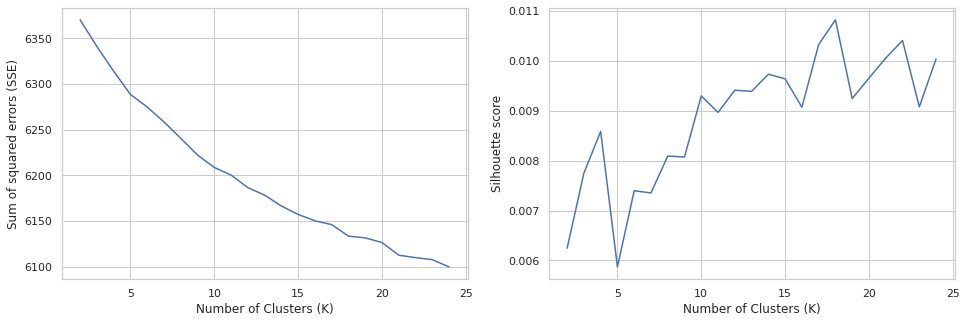

In [ ]:
# Plot SSE for different K
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(cluster_values, SSE)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of squared errors (SSE)')

plt.subplot(1,2,2)
plt.plot(cluster_values, silhouette_scores)
plt.xlabel('Number of Clusters (K)') 
plt.ylabel('Silhouette score')

Highest silhoutte score is for k=18.

In [46]:
# Clustering the data into 18 clusters
kmeans = KMeans(n_clusters=18, init='k-means++', random_state=45)
kmeans.fit(X_svd_3k)
# Adding a kmeans cluster number to dataframe
df2['kmeans_cluster'] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
# Evaluation metrics for the model
#Silhouette  Coefficient ranges from -1 to 1
print("Silhouette Coefficient:", silhouette_score(X_svd_3k, kmeans.labels_, metric='euclidean'))

# Calinski-Harabasz Index
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_svd_3k, kmeans.labels_))

Silhouette Coefficient: 0.012881945706744781
Calinski-Harabasz Index: 22.16986974323541


<Axes: xlabel='kmeans_cluster', ylabel='count'>

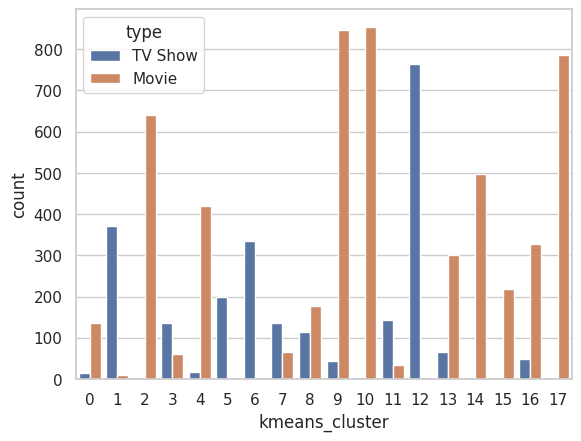

In [49]:
# visualizing number of movies and TV Shows for different clusters
sns.countplot(x='kmeans_cluster', data=df2, hue='type')

In [ ]:
# Trying to find common (similar) words in different clusters using wordcloud
# Function to display word cloud
def plot_wordcloud(cluster_label):
  words_data = ''

  for val in df2[df2['kmeans_cluster']==cluster_label]['movie_data']:
    words_data += " ".join(val) + " "

  wordcloud = WordCloud(width = 700, height = 700, min_font_size = 10).generate(words_data)

  # plot the WordCloud image                      
  plt.imshow(wordcloud)
  plt.axis("off")

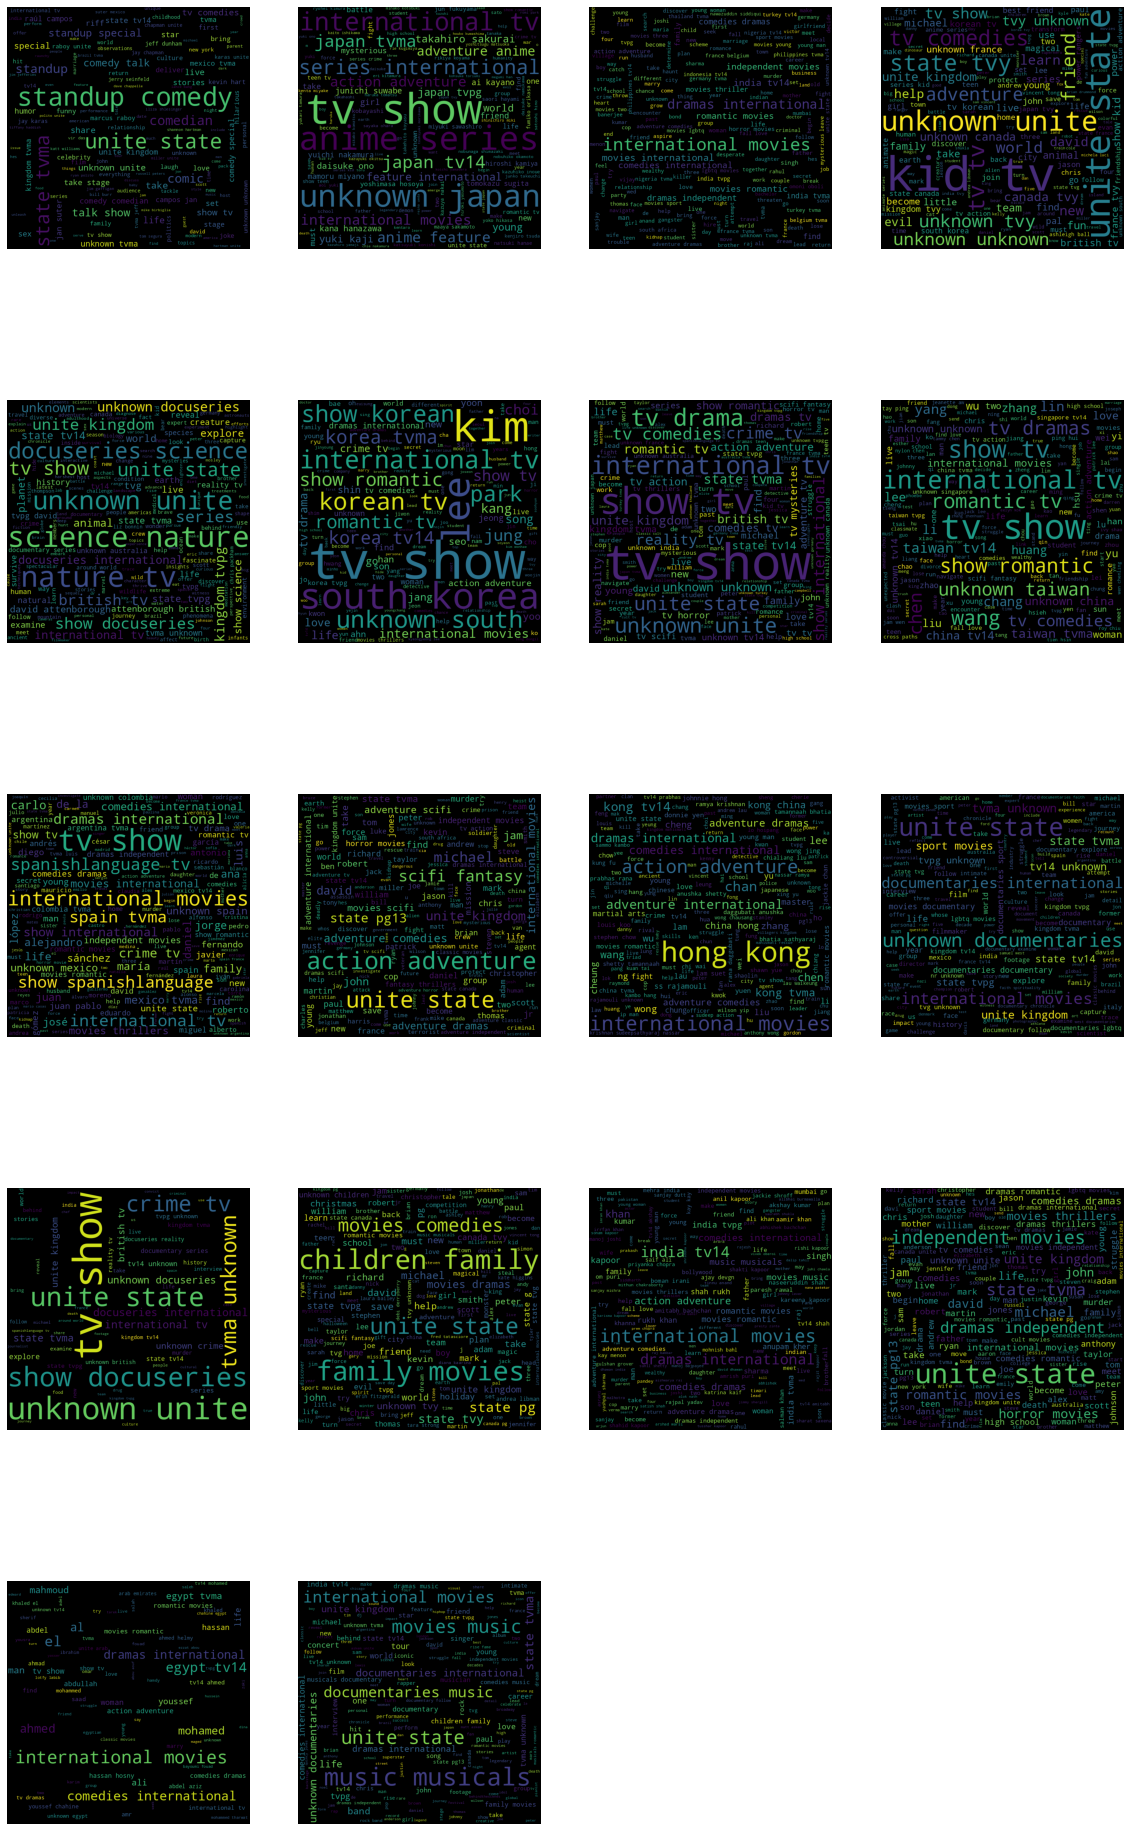

In [ ]:
# Plotting top words for each clusters
plt.figure(figsize=(20, 28))
for i in range(18):
  plt.subplot(5,4,i+1)
  plot_wordcloud(i)

Top similar keywords observed in each clusters are:
* Cluster 0: Standup comedy, comedian, comedy special, talk show
* Cluster 1: Anime Series, Japan, Anime Feature, Takahiro Sakurai
* Cluster 2: Drama International, International movies, comedy international.
* Cluster 3: Kids TV, Friend, Adventure
* Cluster 4: Docuseries, Nature, Science
* Cluster 5: Korean, Kim, South Korea
* Cluster 6: United Kingdom, British, Reality TV, David
* Cluster 7: Romantic, Taiwan, Wang
* Cluster 8: Spain, Spanish, Daniel
* Cluster 9: United State, Action, SiFi
* Cluster 10: Hong Kong, China, Lee, Zhang, action, adventure
* Cluster 11: Sport Movie, Documentry Sport
* Cluster 12: Unknown, Unknown docuseries
* Cluster 13: Children, Family
* Cluster 14: India, Shah rukh, ajay devgn, om puri
* Cluster 15: Independent Movies, Michael, David
* Cluster 16: Egypt, Muhamad, Ahmed
* Cluster 17: Music, Musicals

### ML Model - 2 - Hierarchical Clustering

Text(0, 0.5, 'Distance')

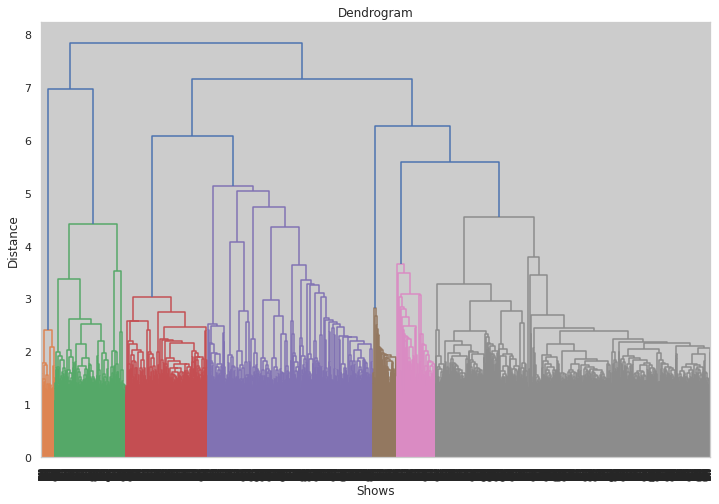

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(12, 8))  
dend = shc.dendrogram(shc.linkage(X_svd_3k, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Shows')
plt.ylabel('Distance')

At around distance 4, 14 clusters can be build using the agglomerative clustering algorithm.

In [50]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')  
hierarchical.fit(X_svd_3k)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=14)

In [53]:
# Adding a hierarchical cluster numbers to dataframe
df2['hierarchical_cluster'] = hierarchical.labels_

In [54]:
# Evaluation metrics for the model
#Silhouette  Coefficient ranges from -1 to 1
print("Silhouette Coefficient:", silhouette_score(X_svd_3k, hierarchical.labels_, metric='euclidean'))

# Calinski-Harabasz Index
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_svd_3k, hierarchical.labels_))

Silhouette Coefficient: 0.006066823354595624
Calinski-Harabasz Index: 20.052462501280797


<Axes: xlabel='hierarchical_cluster', ylabel='count'>

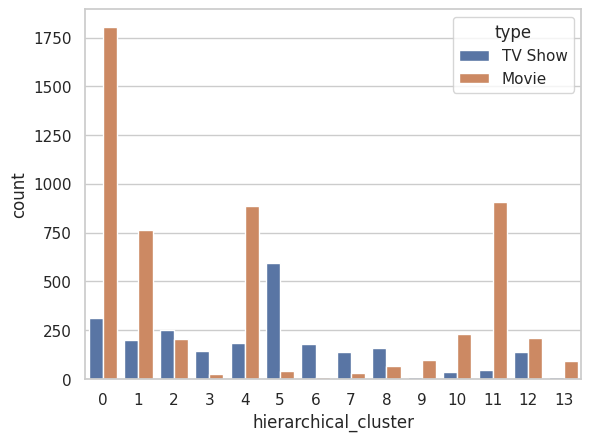

In [55]:
# visualizing number of movies and TV Shows for different clusters
sns.countplot(x='hierarchical_cluster', data=df2, hue='type')

In [ ]:
# Trying to find common words in different clusters using wordcloud
# Function to display word cloud
def plot_wordcloud_hierarchical(cluster_label):
  words_data = ''

  for val in df2[df2['hierarchical_cluster']==cluster_label]['movie_data']:
    words_data += " ".join(val) + " "

  wordcloud = WordCloud(width = 700, height = 700, min_font_size = 10).generate(words_data)

  # plot the WordCloud image                      
  plt.imshow(wordcloud)
  plt.axis("off")

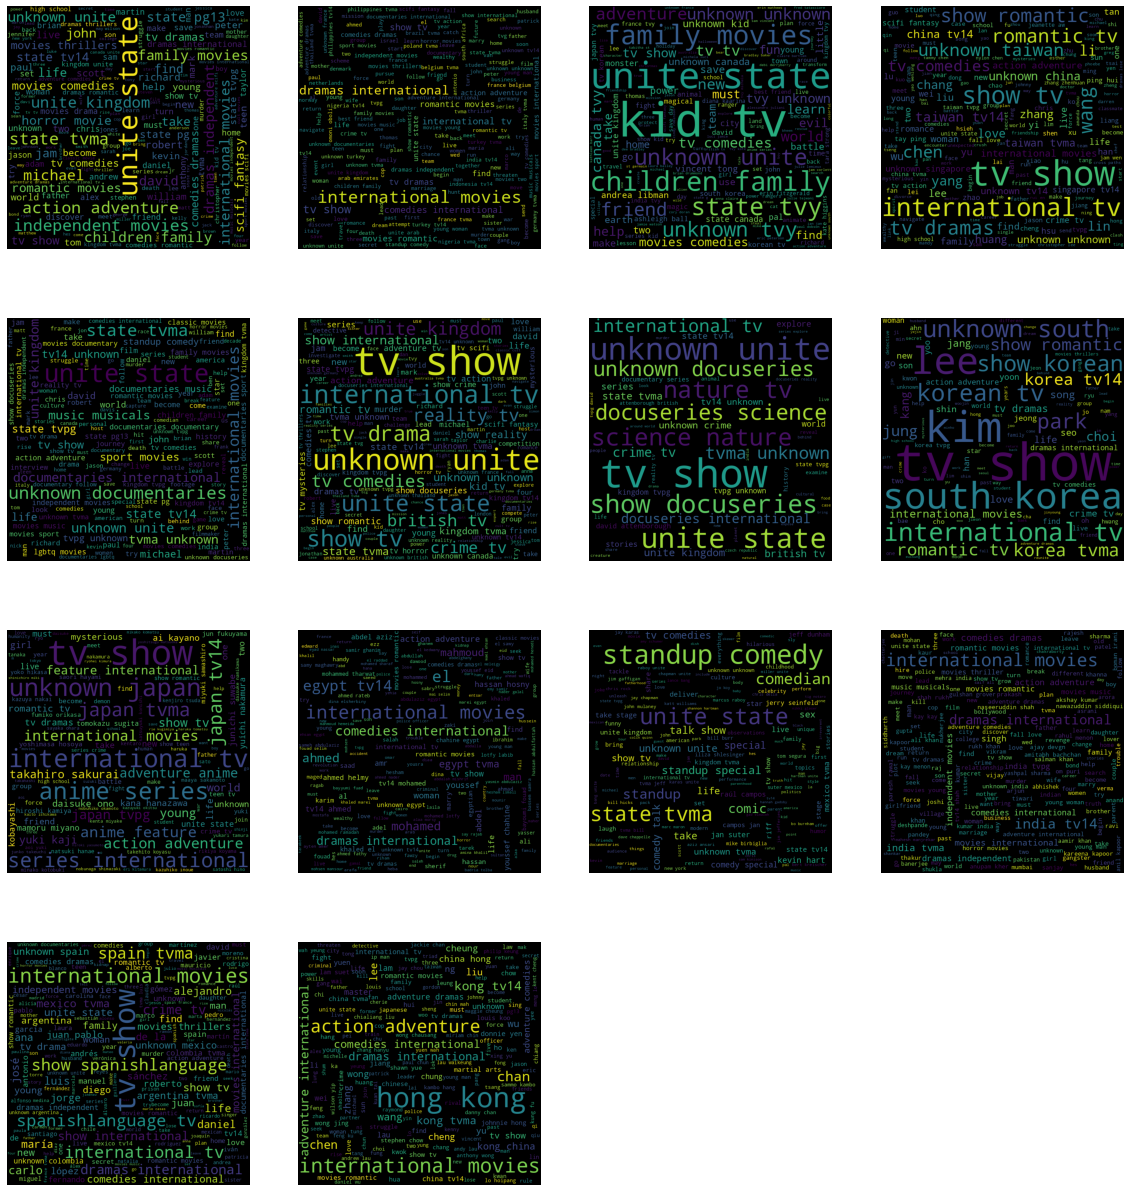

In [ ]:
# Plotting top words for each clusters
plt.figure(figsize=(20, 22))
for i in range(14):
  plt.subplot(4,4,i+1)
  plot_wordcloud_hierarchical(i)

Top similar keywords observed in each clusters are:


* Cluster 0: United State, Sifi, action
* Cluster 1: Drama International, International movies, comedy international.
* Cluster 2: Kids TV, Friend, Adventure
* Cluster 3: Romantic, Taiwan, Wang, China
* Cluster 4: Unknown, Unknown docuseries
* Cluster 5: United Kingdom, British, Reality Show
* Cluster 6: Docuseries, Nature, Science
* Cluster 7: Korean, Kim, South Korea
* Cluster 8: Anime Series, Japan, Anime Feature, Takahiro Sakurai
* Cluster 9: Egypt, Muhamad, Ahmed
* Cluster 10: Standup comedy, comedian, comedy special, talk show
* Cluster 11: India, Shah rukh, ajay devgn, om puri
* Cluster 12: Spain, Spanish, Daniel
* Cluster 13: Hong Kong, China, Lee, Zhang, action, adventure

# **Conclusion**

This project is about text clustering problem in which I had to group Netflix shows into different clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

* There is about 30.8% TV shows and 69.1% Movies in the dataset.
* Recently, more Movies are getting released compared to TV Shows.
* USA has the highest number of both types of shows.
* TV-MA rated movies are most popular.
* TOP 3 content genres are International movies , dramas , comedies.
* Anupan Kher acted in most number of shows.
* Most movies have duration around 90 minutes.
* Most TV Shows have duration 1 Season.
* More shows gets released during winter months.
* For text processing steps includes:
  * Expand Contraction
  * Lower Caseing
  * Removing punctuations, Stopwords, URLs, white spaces etc.
  * Lemmatzation
  * Tokenization
  * TF-IDF vectorization
  * Dimentionality Reduction (to 3000 components)
* Trained two clustering models:
  * KMeans Clustering (18 clusters) with silhoutte score 0.012
  * Hierarchical Clustering (14 clusters) with silhoutte score 0.006

**How this project is useful to stakeholders?**

This clustering project can be useful to stakeholders in various ways. First, it can help content creators and streaming platforms to better understand the preferences and interests of their audience, and accordingly develop and promote content that aligns with those preferences. Second, it can be useful for the platform in recommendation system, it can suggest similar movies or TV shows to users based on their preferences and viewing history and this similar movies or TV Shows can be based on this clusters.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***